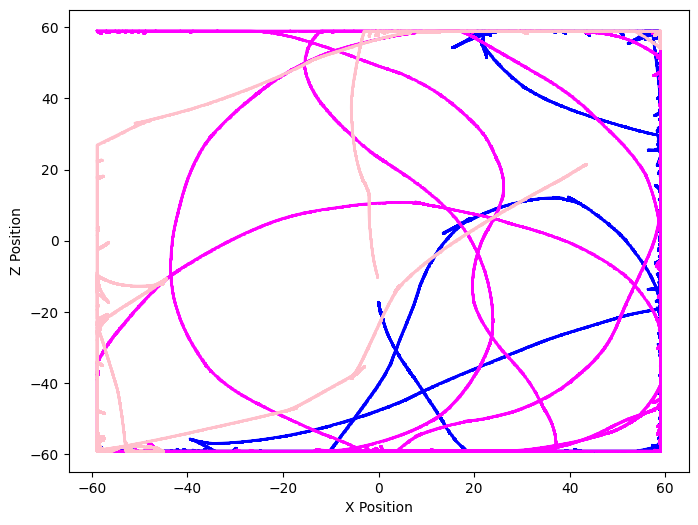

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib widget
# List of CSV files to concatenate
csv_files = ["/Users/nora/Desktop/2719_ArenaPosition2/ArenaPosition_1904-01-07T01-00-00.csv", "/Users/nora/Desktop/2719_ArenaPosition2/ArenaPosition_1904-01-07T02-00-00.csv"]  # Replace with actual file names

# Read and concatenate
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined CSV
df.to_csv("combined.csv", index=False)

# Load the CSV file
file_path = "/Users/nora/Desktop/2723_ArenaPosition/ArenaPosition_1904-01-07T02-00-00.csv"
file_path1 = "/Users/nora/Desktop/2717_ArenaPosition/ArenaPosition_1904-01-07T00-00-00.csv"
file_path2 = "/Users/nora/Desktop/2719_ArenaPosition2/combined.csv"
# Replace with your actual file path
df1 = pd.read_csv(file_path)
df2 = pd.read_csv(file_path1)
df3 = pd.read_csv(file_path2)

# Assuming the CSV has columns: 'time', 'x', 'y'
# If time is the index, make sure it's set properly
# df.set_index('Seconds', inplace=True)

# Plot trajectory
plt.figure(figsize=(8, 6))
plt.plot(df1['Value.X'], df1['Value.Z'], marker='o', linestyle='-', markersize=1, color = 'blue')
plt.plot(df2['Value.X'], df2['Value.Z'], marker='o', linestyle='-', markersize=1, color = 'magenta')
plt.plot(df3['Value.X'], df3['Value.Z'], marker='o', linestyle='-', markersize=1, color = 'pink')

# Labels and title
plt.xlabel("X Position")
plt.ylabel("Z Position")
# plt.title("Point Trajectory Over Time")
# plt.legend()
plt.grid(False)
plt.gcf().patch.set_alpha(1)  # Ensures the figure canvas is visible

plt.savefig("trajectory_plot.svg", dpi=300, transparent=True)

# Show the plot
plt.show()



In [7]:
import os
print(os.getcwd())  # Shows the working directory

/Users/nora/Documents/vestibular_vr_pipeline/photometry_processing


             Value.X        Value.Z
count  115639.000000  115639.000000
mean      100.532102      60.183930
std        30.786147      44.830878
min         0.000000       0.000000
25%        73.729267      22.926591
50%       119.856196      46.270993
75%       119.990558     117.159574
max       120.000000     120.000000


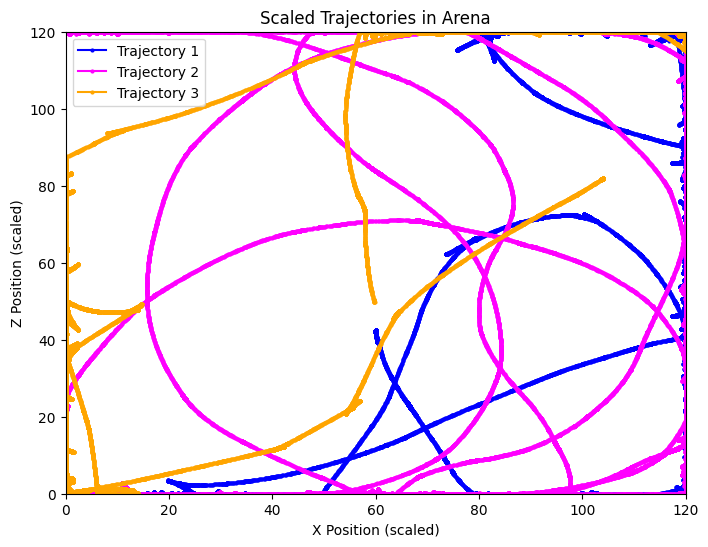

Total distance traveled in Trajectory 1: 1683.70 cm
Total distance traveled in Trajectory 2: 2179.01 cm
Total distance traveled in Trajectory 3: 1175.21 cm


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV files
file_path1 = "/Users/nora/Desktop/2723_ArenaPosition/ArenaPosition_1904-01-07T02-00-00.csv"
file_path2 = "/Users/nora/Desktop/2717_ArenaPosition/ArenaPosition_1904-01-07T00-00-00.csv"
file_path3 = "/Users/nora/Desktop/2719_ArenaPosition2/combined.csv"

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)

# Convert columns to numeric
for df in [df1, df2, df3]:
    df['Value.X'] = pd.to_numeric(df['Value.X'], errors='coerce')
    df['Value.Z'] = pd.to_numeric(df['Value.Z'], errors='coerce')

# Function to rescale a column to the range [0, 120]
def rescale_column(df, column):
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = 120 * (df[column] - min_val) / (max_val - min_val)

# Rescale X and Z positions
for df in [df1, df2, df3]:
    rescale_column(df, 'Value.X')
    rescale_column(df, 'Value.Z')

# Check scaled values
print(df1[['Value.X', 'Value.Z']].describe())

# Plot rescaled trajectories
plt.figure(figsize=(8, 6))
plt.plot(df1['Value.X'], df1['Value.Z'], marker='o', linestyle='-', markersize=2, color='blue', label="Trajectory 1")
plt.plot(df2['Value.X'], df2['Value.Z'], marker='o', linestyle='-', markersize=2, color='magenta', label="Trajectory 2")
plt.plot(df3['Value.X'], df3['Value.Z'], marker='o', linestyle='-', markersize=2, color='orange', label="Trajectory 3")

# Set fixed axis range
plt.xlim(0, 120)
plt.ylim(0, 120)

# Labels and title
plt.xlabel("X Position (scaled)")
plt.ylabel("Z Position (scaled)")
plt.title("Scaled Trajectories in Arena")
plt.legend()
plt.grid(False)

# Save transparent figure
plt.savefig("scaled_trajectory_plot.png", dpi=300, transparent=True)
plt.show()

# Function to compute traveled distance
def calculate_distance(df, x_col='Value.X', z_col='Value.Z'):
    x, z = df[x_col].values, df[z_col].values
    distances = np.sqrt(np.diff(x)**2 + np.diff(z)**2)
    return np.sum(distances)

# Compute distances
distance1 = calculate_distance(df1)
distance2 = calculate_distance(df2)
distance3 = calculate_distance(df3)
total_distance = distance1 + distance2 + distance3

# Print results
print(f"Total distance traveled in Trajectory 1: {distance1:.2f} cm")
print(f"Total distance traveled in Trajectory 2: {distance2:.2f} cm")
print(f"Total distance traveled in Trajectory 3: {distance3:.2f} cm")
